In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

In [3]:
# cap= cv2.VideoCapture('entrada.avi')
# i=0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == False:
#         break
#     cv2.imwrite('frames/frame'+str(i)+'.jpg',frame)
#     i+=1
 
# cap.release()
# cv2.destroyAllWindows()

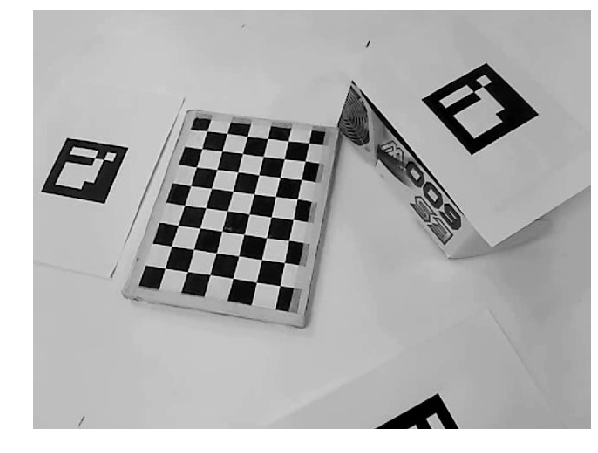

In [4]:
frame = cv2.imread('frames/frame858.jpg', 0)
show(frame)

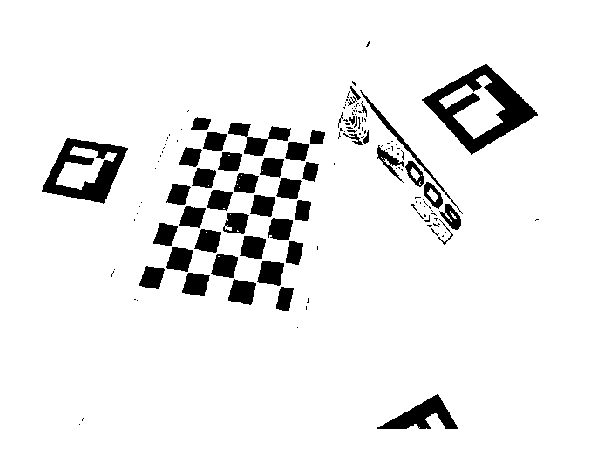

In [83]:
frame_bin = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 85, 60)
show(frame_bin)

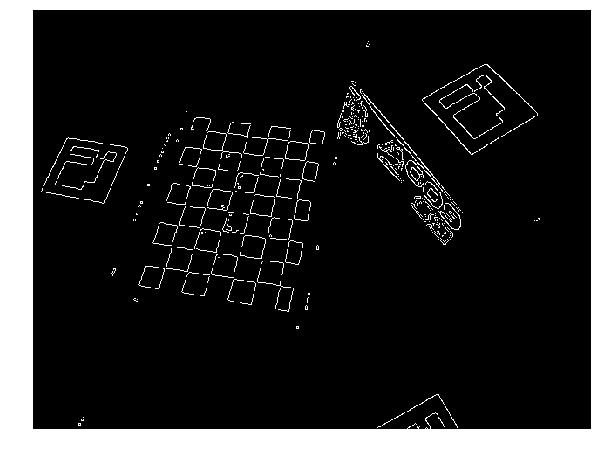

In [84]:
can = cv2.Canny(frame_bin, 100, 200, 7)
show(can)

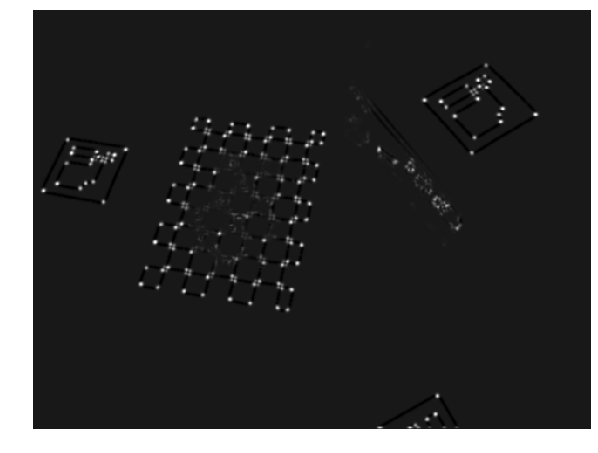

In [68]:
corner = cv2.cornerHarris(frame_bin, 3, 25, 0.004)
show(corner)

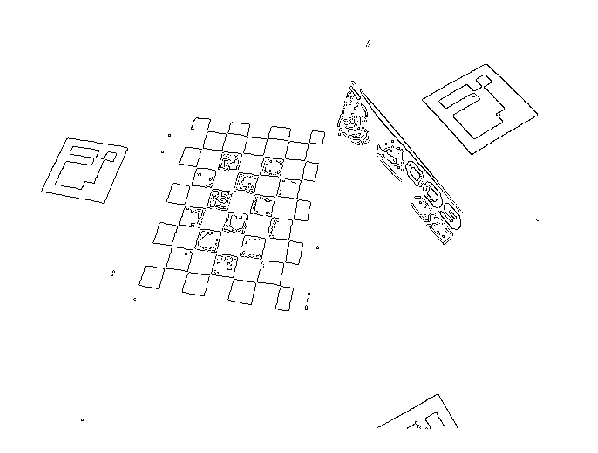

In [8]:
can_inv = np.abs(can - 255)
show(can_inv)

In [9]:
# cv2.imshow('ImageWindow', corner)
# cv2.waitKey(0)

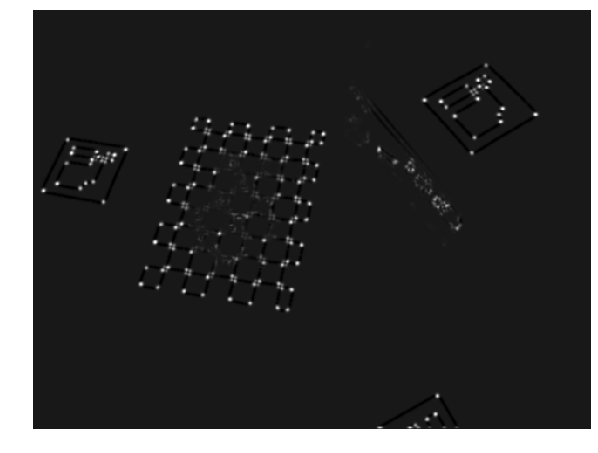

In [69]:
cc = corner + can
show(cc)

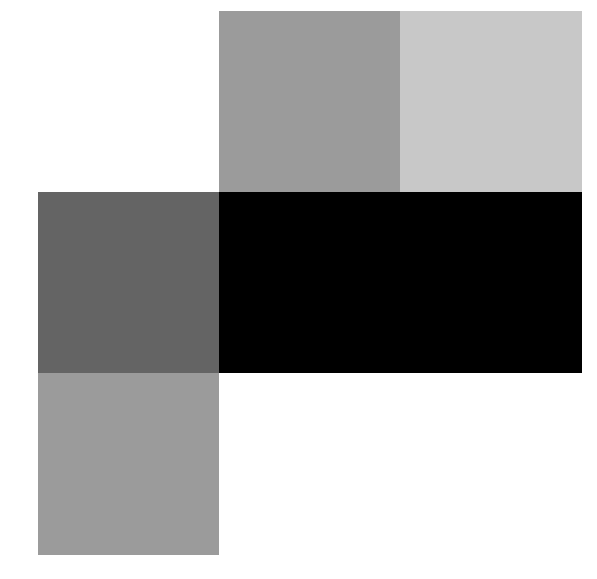

In [11]:
img = [[255,155,200],
      [100,0, 0],
      [155, 255, 255]]
show(img)

In [12]:
img[1][0]

100

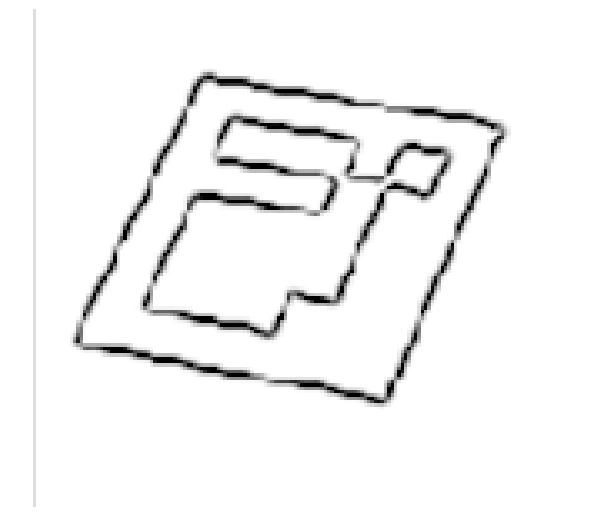

(149, 167)

In [13]:
teste = cv2.imread('teste1.png', 0)
show(teste)
teste.shape

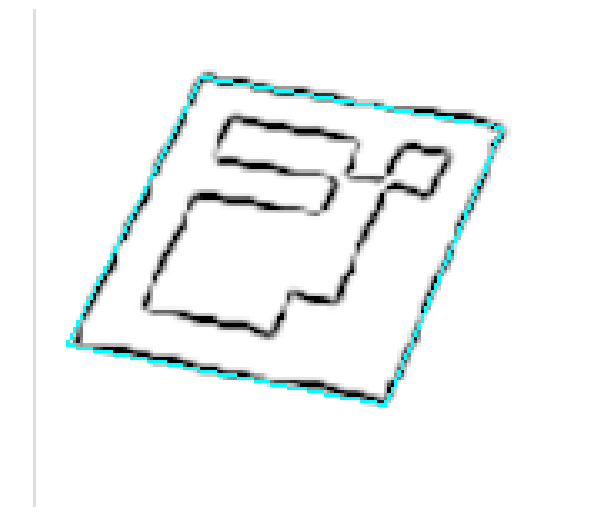

In [14]:
teste = cv2.imread('teste1.png')
pts = np.array([[50,20],[10,100],[105,118],[140,35]])
cv2.polylines(teste,[pts],True,(0, 255, 255), 1)
show(teste)

In [15]:
max(img[2][1], img[2][2], img[2][0])

255

In [16]:
#funcao que vai caminhar na imagem em que as bordas ja estao selecionadas, pra qualquer pixel que nao for branco
#a possibilidade de ser um alvo, chama a funcao procura_alvo pra esse pixel pra fazer o teste
def extrai_bordas(corner):
    for i in range(corner.shape[0]):
        for j in range(corner.shape[1]):
            if corner[i][j] != 255:
                procura_alvo(corner, i, j)

#funcao que vai guardar os valores dos quatro vertices do alvo baseado em um ponto que foi dado como possivel
#vertice inicial do alvo
#primeiramente vai escolher o ponto de tom mais escuro nos arredores desse primeiro ponto dado
#depois vai caminhando em uma direcao de acordo cm a tonalidade mais escura
#quando mudar de direcao temos outro vertice
def procura_alvo(corner, i, j):
    #guardando os valores dos pixels ao redor do pixel que estamos analisando
    pts_kernel = pontos_kernel(corner,i,j)
    
    #vendo qual o menor valor dentre os pixels ao redor do centro (aquele mais prox do preto)
    corner_x = min(pts_kernel, key=pts_kernel.get)
    
    #a posicao i,j do primeiro canto do quadrado vai ser o menor valor analisado (comparar o corner_x com o centro)
    if (pts_kernel[corner_x] < img[i][j]):
        corner_1 = pos_ponto_kernel(corner_x,i,j)
    else:
        corner_1 = [i,j]
        
    #a primeira direcao sempre vai ser pra direita e pra baixo, chamaremos ela de d1
    #enquanto os valores mais escuros forem 5,7 e 8 ainda estara andando em d1
    #a direcao d2 sempre sera pra esquerda e pra baixo, valores 4,6 e 7
    #unica excecao vai ser quando o retangulo esta reto e vai primeiro so pra direita e dps so pra baixo

#funcao que vai pegar os valores do pixel no kernel 3X3 em que o ponto i,j passado é o centro e nao calculado
def pontos_kernel(img,i,j):
    pt_1 = img[i-1][j-1]
    pt_2 = img[i-1][j]
    pt_3 = img[i-1][j+1]
    pt_4 = img[i][j-1]
    pt_5 = img[i][j+1]
    pt_6 = img[i+1][j-1]
    pt_7 = img[i+1][j]
    pt_8 = img[i+1][j+1]
    return {'1': pt_1, '2': pt_2, '3': pt_3, '4': pt_4, '5': pt_5, '6': pt_6, '7': pt_7, '8': pt_8}

#funcao que vai retornar o valor da posicao na img dado a posicao do ponto no kernel e a posicao i,j do centro
def pos_ponto_kernel(x,i,j):
    if x==1:
        return [i-1,j-1]
    if x==2 
        return [i-1,j]
    if x==3:
        return [i-1,j+1]
    if x==4:
        return [i,j-1]
    if x==5:
        return [i,j+1]
    if x==6:
        return [i+1,j-1]
    if x==7:
        return [i+1,j]
    if x==8:
        return [i+1,j+1]    

SyntaxError: invalid syntax (<ipython-input-16-50dc9456a373>, line 48)

In [ ]:
img = [[255,155,0],
      [100,225, 0],
      [0, 0, 0]]
show(img)

In [ ]:
procura_alvo(img,1,1)